In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd


# Part - 2


### 2.3(a) Abrupt change - using Optimistic Greedy Method

In [11]:

def abrupt_optimistic_greedy(steps, bandit_problems, n_actions, testbed, global_reward_list, global_optimal_action_list):
    action_count = np.zeros((bandit_problems, n_actions))
    reward_estimates = np.ones((bandit_problems, n_actions)) * 5  # initial optimisitc reward estimates
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)
    terminal_rewards = np.zeros(bandit_problems)  # Initialize terminal rewards array

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0
        if np.random.rand() < 0.005:
            # Permute the means of the reward distributions with a probability of 0.005
            for b in range(bandit_problems):
                np.random.shuffle(testbed[b]) #Using np.random.shuffle

        for problem_index in range(bandit_problems):
            maxval = np.amax(reward_estimates[problem_index])  # Find the maximum value of the reward for that problem.
            maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval))  # Get the index of that reward in the problem
            random_choice = np.random.choice(maxval_indices)  # Randomly select one index from the list of indices with the highest estimated reward.

            # Generate reward
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            # Update reward estimate
            reward_estimates[problem_index][random_choice] = reward_estimates[problem_index][random_choice] + (Rn - reward_estimates[problem_index][random_choice]) / n

            reward_sum_over_all_bandits_per_step += Rn

            # Store terminal rewards
            if step == steps - 1:
                terminal_rewards[problem_index] = Rn

            # Check if the optimal action was chosen
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    global_reward_list.append(avg_rewards_per_step)
    global_optimal_action_list.append(optimal_action_count)
    return terminal_rewards


### 2.3(b) Abrupt change - using epsilon with fixed step size

In [12]:
def abrupt_epsilon_fixed_step(steps, bandit_problems, n_actions, testbed, epsilon):
    action_count = np.ones((bandit_problems, n_actions))
    reward_estimates = np.zeros((bandit_problems, n_actions))  # initial reward estimates set to zero
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)
    terminal_rewards = np.zeros(bandit_problems)  # Initialize terminal rewards array
    step_size = 0.1  # Fixed step size

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0
        if np.random.rand() < 0.005:
            # Permute the means of the reward distributions with a probability of 0.005
            for b in range(bandit_problems):
                np.random.shuffle(testbed[b])

        for problem_index in range(bandit_problems):
            var_random = random.random()
            if var_random > epsilon:
                maxval = np.amax(reward_estimates[problem_index])  # Find the maximum value of the reward for that problem.
                maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval))  # Get the index of that reward in the problem
                random_choice = np.random.choice(maxval_indices)  # Randomly select one index from the list of indices with the highest estimated reward.
            else:
                random_choice = np.random.randint(n_actions)

            # Generate reward from the testbed
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            # Update reward estimate
            reward_estimates[problem_index][random_choice] = reward_estimates[problem_index][random_choice] + step_size * (Rn - reward_estimates[problem_index][random_choice])
            reward_sum_over_all_bandits_per_step += Rn

            #Storing terminal rewards
            if step == steps - 1:
                terminal_rewards[problem_index] = Rn

            # Check if the optimal action was taken
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    return avg_rewards_per_step, optimal_action_count, terminal_rewards



### 2.3(c) Abrupt change - using epsilon with decreasing step size

In [13]:

def abrupt_epsilon_decreasing_step(steps, bandit_problems, n_actions, testbed, epsilon):
    action_count = np.ones((bandit_problems, n_actions))
    reward_estimates = np.zeros((bandit_problems, n_actions))  # initial reward estimates set to zero
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)
    terminal_rewards = np.zeros(bandit_problems)  # Initialize terminal rewards array

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0
        if np.random.rand() < 0.005:
            # Permute the means of the reward distributions
            for b in range(bandit_problems):
                np.random.shuffle(testbed[b])


        for problem_index in range(bandit_problems):
            var_random = random.random()
            if var_random > epsilon:
                maxval = np.amax(reward_estimates[problem_index])  # Find the maximum value of the reward for that problem.
                maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval))  # Get the index of that reward in the problem
                random_choice = np.random.choice(maxval_indices)  # Randomly select one index from the list of indices with the highest estimated reward.
            else:
                random_choice = np.random.randint(n_actions)

            # Generate reward from the testbed
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            step_size = 1/n # Decreasing step size

            # Update reward estimate using the incremental implementation of the simple average method
            reward_estimates[problem_index][random_choice] = reward_estimates[problem_index][random_choice] + step_size * (Rn - reward_estimates[problem_index][random_choice])

            reward_sum_over_all_bandits_per_step += Rn

            # Store terminal rewards
            if step == steps - 1:
                terminal_rewards[problem_index] = Rn

            # Check if the optimal action was taken
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    return avg_rewards_per_step, optimal_action_count, terminal_rewards



### Plotting and results

<ipython-input-14-cdba3d4b5e29>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Method', y='Reward', data=df, palette='Set2')


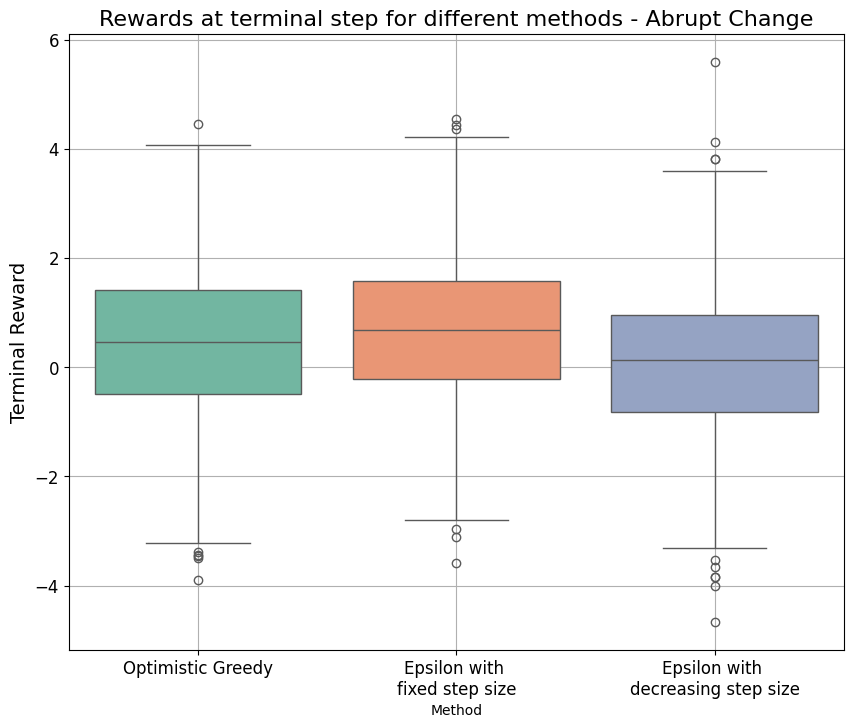

In [14]:
steps = 10000
bandit_problems = 1000
n_actions = 10
# Testbed: 1000 sets of ten mean parameters
testbed = np.random.normal(0, 1, (bandit_problems, n_actions))
global_reward_list = []
global_optimal_action_list = []


#optimistic greedy
terminal_greedy=abrupt_optimistic_greedy(steps, bandit_problems, n_actions, testbed, global_reward_list, global_optimal_action_list)

#fixed step size
epsilon = 0.1
# Testbed: 1000 sets of ten mean parameters
testbed = np.random.normal(0, 1, (bandit_problems, n_actions))
# calling the function for fixed step epsilon greedt
avg_rewards_per_step, optimal_action_count, terminal_rewards_fixed = abrupt_epsilon_fixed_step(steps, bandit_problems, n_actions, testbed, epsilon)


# decreasing step size
testbed = np.random.normal(0, 1, (bandit_problems, n_actions)) # Testbed: 1000 sets of ten mean parameters
avg_rewards_per_step, optimal_action_count,terminal_rewards_decreasing = abrupt_epsilon_decreasing_step(steps, bandit_problems, n_actions, testbed, epsilon)


all_avg_rewards = [terminal_greedy, terminal_rewards_fixed, terminal_rewards_decreasing]
# Prepare the data for seaborn
methods = ['Optimistic Greedy', 'Epsilon with \nfixed step size', 'Epsilon with \ndecreasing step size']
data = []

for i, method in enumerate(methods):
    for reward in all_avg_rewards[i]:
        data.append((method, reward))


df = pd.DataFrame(data, columns=['Method', 'Reward'])

# Box plot to compare all three methods

plt.figure(figsize=(10, 8))
sns.boxplot(x='Method', y='Reward', data=df, palette='Set2')

plt.title('Rewards at terminal step for different methods - Abrupt Change', fontsize=16)
plt.ylabel('Terminal Reward', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


In [15]:
abrupt_change_avg_performance = df.groupby('Method').mean()
abrupt_change_avg_performance

,Reward
Method,
Epsilon with \ndecreasing step size,0.101931
Epsilon with \nfixed step size,0.666137
Optimistic Greedy,0.414898
